# Mean Reversion Strategy


## Getting Forex Data Stream

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from itertools import product

In [2]:
#connect to client
from ib_insync import *
util.startLoop()
ib = IB()

In [3]:
ib.connect('127.0.0.1', 7496)

<IB connected to 127.0.0.1:7496 clientId=1>

In [4]:
ib.reqMarketDataType(1)

In [5]:
# For Foreign exchange
forex_contract = Forex("EURUSD")
forex_contract

Forex('EURUSD', exchange='IDEALPRO')

In [6]:
stream_data = ib.reqHistoricalData(
    forex_contract,
    endDateTime = '', 
    durationStr = '6 M', 
    barSizeSetting = '2 hours', 
    whatToShow = 'MIDPOINT',
    useRTH = True
)

data = util.df(stream_data)
data["date"]= data["date"].dt.tz_convert(None)
data = data.set_index('date')
data

,open,high,low,close,volume,average,barCount
date,,,,,,,
2022-12-04 22:15:00,1.05390,1.05440,1.05305,1.05440,-1.0,-1.0,-1
2022-12-05 00:00:00,1.05440,1.05745,1.05395,1.05680,-1.0,-1.0,-1
2022-12-05 02:00:00,1.05680,1.05830,1.05575,1.05805,-1.0,-1.0,-1
2022-12-05 04:00:00,1.05805,1.05850,1.05750,1.05835,-1.0,-1.0,-1
2022-12-05 06:00:00,1.05835,1.05835,1.05305,1.05390,-1.0,-1.0,-1
...,...,...,...,...,...,...,...
2023-06-02 12:00:00,1.07575,1.07710,1.07350,1.07420,-1.0,-1.0,-1
2023-06-02 14:00:00,1.07420,1.07500,1.07175,1.07230,-1.0,-1.0,-1
2023-06-02 16:00:00,1.07230,1.07240,1.07075,1.07100,-1.0,-1.0,-1


In [7]:
ib.disconnect()

## Defining a Mean-Reversion Strategy (Bollinger Bands)

Sometime instruments are overbought/oversold and revert back to mean prices

In [8]:
SMA = 30
dev = 2

In [9]:
new = data['close'].to_frame()
new

,close
date,
2022-12-04 22:15:00,1.05440
2022-12-05 00:00:00,1.05680
2022-12-05 02:00:00,1.05805
2022-12-05 04:00:00,1.05835
2022-12-05 06:00:00,1.05390
...,...
2023-06-02 12:00:00,1.07420
2023-06-02 14:00:00,1.07230
2023-06-02 16:00:00,1.07100


In [10]:
new['SMA'] = new['close'].rolling(SMA).mean()
new

,close,SMA
date,,
2022-12-04 22:15:00,1.05440,NaN
2022-12-05 00:00:00,1.05680,NaN
2022-12-05 02:00:00,1.05805,NaN
2022-12-05 04:00:00,1.05835,NaN
2022-12-05 06:00:00,1.05390,NaN
...,...,...
2023-06-02 12:00:00,1.07420,1.071840
2023-06-02 14:00:00,1.07230,1.072003
2023-06-02 16:00:00,1.07100,1.072117


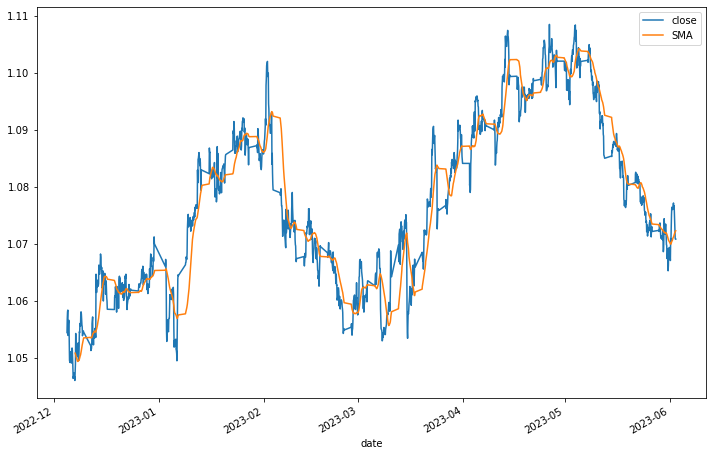

In [11]:
new[['close', 'SMA']].plot(figsize = (12,8))

In [12]:
new['close'].rolling(SMA).std()

date
2022-12-04 22:15:00         NaN
2022-12-05 00:00:00         NaN
2022-12-05 02:00:00         NaN
2022-12-05 04:00:00         NaN
2022-12-05 06:00:00         NaN
                         ...   
2023-06-02 12:00:00    0.004018
2023-06-02 14:00:00    0.003930
2023-06-02 16:00:00    0.003847
2023-06-02 18:00:00    0.003775
2023-06-02 20:00:00    0.003741
Name: close, Length: 1604, dtype: float64

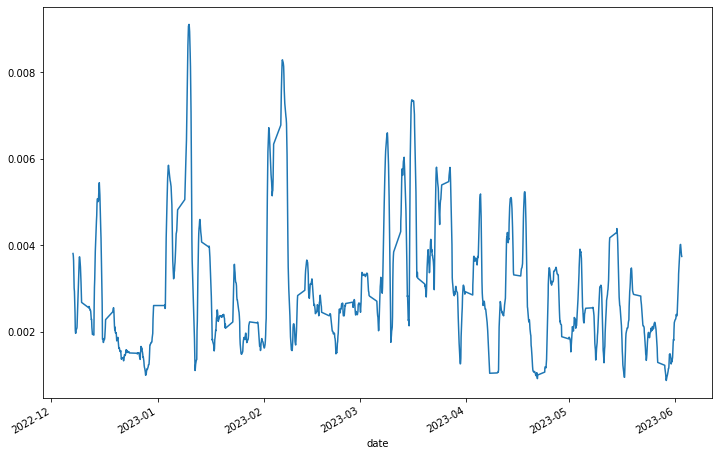

In [13]:
new['close'].rolling(SMA).std().plot(figsize = (12, 8))

In [14]:
# lower band -2 std dev
new["Lower"] = new["SMA"] - new["close"].rolling(SMA).std() * dev

In [15]:
# upper band -2 std dev
new["Upper"] = new["SMA"] + new["close"].rolling(SMA).std() * dev

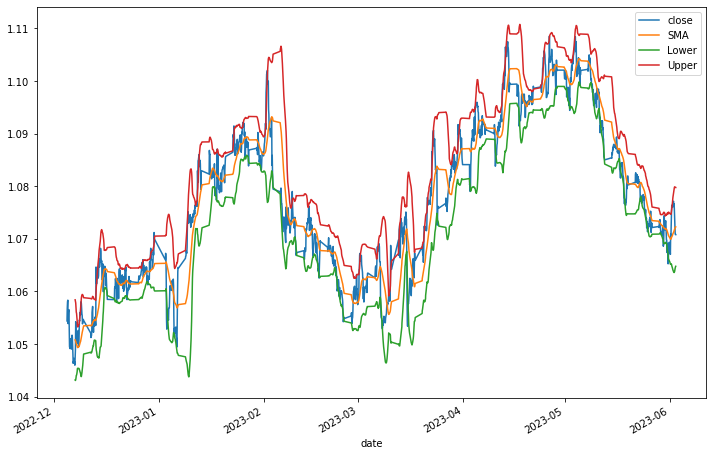

In [16]:
new.plot(figsize = (12, 8))

In [17]:
new.dropna(inplace = True)
new

,close,SMA,Lower,Upper
date,,,,
2022-12-07 08:00:00,1.04760,1.050800,1.043183,1.058417
2022-12-07 10:00:00,1.04895,1.050618,1.043097,1.058140
2022-12-07 12:00:00,1.05425,1.050533,1.043247,1.057820
2022-12-07 14:00:00,1.05040,1.050278,1.043568,1.056989
2022-12-07 16:00:00,1.05180,1.050060,1.044046,1.056074
...,...,...,...,...
2023-06-02 12:00:00,1.07420,1.071840,1.063803,1.079877
2023-06-02 14:00:00,1.07230,1.072003,1.064143,1.079864
2023-06-02 16:00:00,1.07100,1.072117,1.064422,1.079811


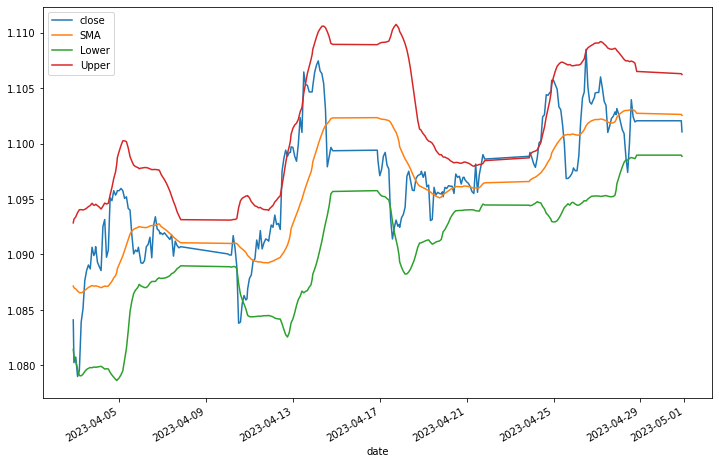

In [18]:
new.loc["2023-04"].plot(figsize = (12, 8))

In [19]:
new["log_returns"] = np.log(new["close"].div(new["close"].shift(1)))
new.dropna(inplace = True)
new

,close,SMA,Lower,Upper,log_returns
date,,,,,
2022-12-07 10:00:00,1.04895,1.050618,1.043097,1.058140,0.001288
2022-12-07 12:00:00,1.05425,1.050533,1.043247,1.057820,0.005040
2022-12-07 14:00:00,1.05040,1.050278,1.043568,1.056989,-0.003659
2022-12-07 16:00:00,1.05180,1.050060,1.044046,1.056074,0.001332
2022-12-07 18:00:00,1.05145,1.049978,1.044115,1.055841,-0.000333
...,...,...,...,...,...
2023-06-02 12:00:00,1.07420,1.071840,1.063803,1.079877,-0.001442
2023-06-02 14:00:00,1.07230,1.072003,1.064143,1.079864,-0.001770
2023-06-02 16:00:00,1.07100,1.072117,1.064422,1.079811,-0.001213


In [20]:
new['distance'] = new.close - new.SMA
#where oversold -> long the instrument
new['position'] = np.where(new.close < new.Lower, 1, np.nan)
#where overbought -> go short
new['position'] = np.where(new.close > new.Upper, -1, new['position'])
new

,close,SMA,Lower,Upper,log_returns,distance,position
date,,,,,,,
2022-12-07 10:00:00,1.04895,1.050618,1.043097,1.058140,0.001288,-0.001668,NaN
2022-12-07 12:00:00,1.05425,1.050533,1.043247,1.057820,0.005040,0.003717,NaN
2022-12-07 14:00:00,1.05040,1.050278,1.043568,1.056989,-0.003659,0.000122,NaN
2022-12-07 16:00:00,1.05180,1.050060,1.044046,1.056074,0.001332,0.001740,NaN
2022-12-07 18:00:00,1.05145,1.049978,1.044115,1.055841,-0.000333,0.001472,NaN
...,...,...,...,...,...,...,...
2023-06-02 12:00:00,1.07420,1.071840,1.063803,1.079877,-0.001442,0.002360,NaN
2023-06-02 14:00:00,1.07230,1.072003,1.064143,1.079864,-0.001770,0.000297,NaN
2023-06-02 16:00:00,1.07100,1.072117,1.064422,1.079811,-0.001213,-0.001117,NaN


In [21]:
# neutral when SMA crosses close out position and go neutral
new['position'] = np.where(new.distance * new.distance.shift(1) < 0, 0, new['position'])
new

,close,SMA,Lower,Upper,log_returns,distance,position
date,,,,,,,
2022-12-07 10:00:00,1.04895,1.050618,1.043097,1.058140,0.001288,-0.001668,NaN
2022-12-07 12:00:00,1.05425,1.050533,1.043247,1.057820,0.005040,0.003717,0.0
2022-12-07 14:00:00,1.05040,1.050278,1.043568,1.056989,-0.003659,0.000122,NaN
2022-12-07 16:00:00,1.05180,1.050060,1.044046,1.056074,0.001332,0.001740,NaN
2022-12-07 18:00:00,1.05145,1.049978,1.044115,1.055841,-0.000333,0.001472,NaN
...,...,...,...,...,...,...,...
2023-06-02 12:00:00,1.07420,1.071840,1.063803,1.079877,-0.001442,0.002360,NaN
2023-06-02 14:00:00,1.07230,1.072003,1.064143,1.079864,-0.001770,0.000297,NaN
2023-06-02 16:00:00,1.07100,1.072117,1.064422,1.079811,-0.001213,-0.001117,0.0


In [22]:
#fill in na values to indicate continuing postion
new['position'] = new['position'].ffill().fillna(0)
new

,close,SMA,Lower,Upper,log_returns,distance,position
date,,,,,,,
2022-12-07 10:00:00,1.04895,1.050618,1.043097,1.058140,0.001288,-0.001668,0.0
2022-12-07 12:00:00,1.05425,1.050533,1.043247,1.057820,0.005040,0.003717,0.0
2022-12-07 14:00:00,1.05040,1.050278,1.043568,1.056989,-0.003659,0.000122,0.0
2022-12-07 16:00:00,1.05180,1.050060,1.044046,1.056074,0.001332,0.001740,0.0
2022-12-07 18:00:00,1.05145,1.049978,1.044115,1.055841,-0.000333,0.001472,0.0
...,...,...,...,...,...,...,...
2023-06-02 12:00:00,1.07420,1.071840,1.063803,1.079877,-0.001442,0.002360,-1.0
2023-06-02 14:00:00,1.07230,1.072003,1.064143,1.079864,-0.001770,0.000297,-1.0
2023-06-02 16:00:00,1.07100,1.072117,1.064422,1.079811,-0.001213,-0.001117,0.0


In [23]:
# 0 is neutral position, 1 is long position, -1 is short position
new['position'].value_counts()

 0.0    790
 1.0    411
-1.0    373
Name: position, dtype: int64

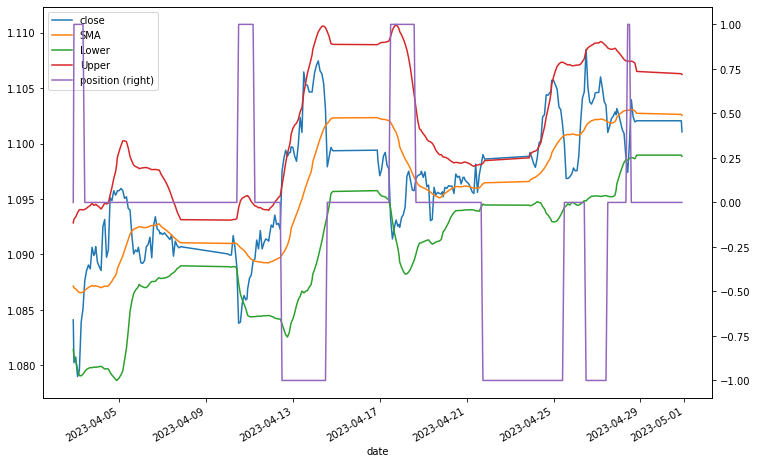

In [24]:
# seeing strategy in one month
new.drop(columns = ['log_returns', 'distance']).loc["2023-04"].plot(figsize = (12, 8), secondary_y = 'position')

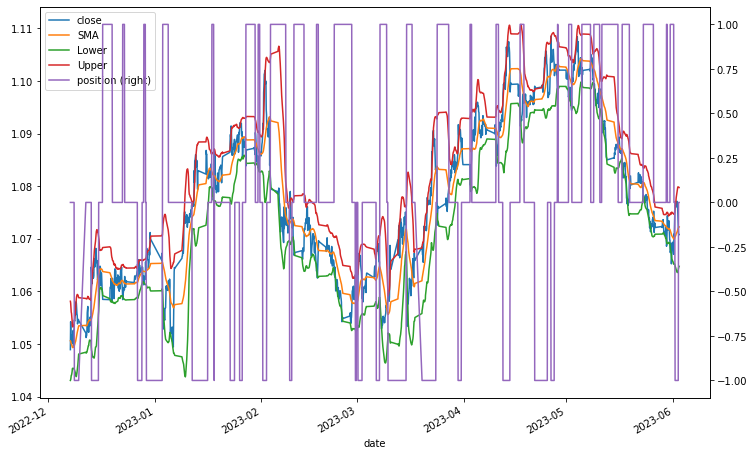

In [25]:
#whole period
new.drop(columns = ['log_returns', 'distance']).plot(figsize = (12, 8), secondary_y = 'position')

## Vectorized Backtesting

In [26]:
# strategy returns
new['strategy'] = new['position'].shift(1) * new['log_returns']
new.dropna(inplace = True)
new

,close,SMA,Lower,Upper,log_returns,distance,position,strategy
date,,,,,,,,
2022-12-07 12:00:00,1.05425,1.050533,1.043247,1.057820,0.005040,0.003717,0.0,0.000000
2022-12-07 14:00:00,1.05040,1.050278,1.043568,1.056989,-0.003659,0.000122,0.0,-0.000000
2022-12-07 16:00:00,1.05180,1.050060,1.044046,1.056074,0.001332,0.001740,0.0,0.000000
2022-12-07 18:00:00,1.05145,1.049978,1.044115,1.055841,-0.000333,0.001472,0.0,-0.000000
2022-12-07 20:00:00,1.05045,1.049795,1.044378,1.055212,-0.000952,0.000655,0.0,-0.000000
...,...,...,...,...,...,...,...,...
2023-06-02 12:00:00,1.07420,1.071840,1.063803,1.079877,-0.001442,0.002360,-1.0,0.001442
2023-06-02 14:00:00,1.07230,1.072003,1.064143,1.079864,-0.001770,0.000297,-1.0,0.001770
2023-06-02 16:00:00,1.07100,1.072117,1.064422,1.079811,-0.001213,-0.001117,0.0,0.001213


In [27]:
# cumulative returns
new['creturns'] = new['log_returns'].cumsum().apply(np.exp)
new['cstrategy'] = new['strategy'].cumsum().apply(np.exp)
new

,close,SMA,Lower,Upper,log_returns,distance,position,strategy,creturns,cstrategy
date,,,,,,,,,,
2022-12-07 12:00:00,1.05425,1.050533,1.043247,1.057820,0.005040,0.003717,0.0,0.000000,1.005053,1.000000
2022-12-07 14:00:00,1.05040,1.050278,1.043568,1.056989,-0.003659,0.000122,0.0,-0.000000,1.001382,1.000000
2022-12-07 16:00:00,1.05180,1.050060,1.044046,1.056074,0.001332,0.001740,0.0,0.000000,1.002717,1.000000
2022-12-07 18:00:00,1.05145,1.049978,1.044115,1.055841,-0.000333,0.001472,0.0,-0.000000,1.002383,1.000000
2022-12-07 20:00:00,1.05045,1.049795,1.044378,1.055212,-0.000952,0.000655,0.0,-0.000000,1.001430,1.000000
...,...,...,...,...,...,...,...,...,...,...
2023-06-02 12:00:00,1.07420,1.071840,1.063803,1.079877,-0.001442,0.002360,-1.0,0.001442,1.024072,1.107397
2023-06-02 14:00:00,1.07230,1.072003,1.064143,1.079864,-0.001770,0.000297,-1.0,0.001770,1.022260,1.109359
2023-06-02 16:00:00,1.07100,1.072117,1.064422,1.079811,-0.001213,-0.001117,0.0,0.001213,1.021021,1.110706


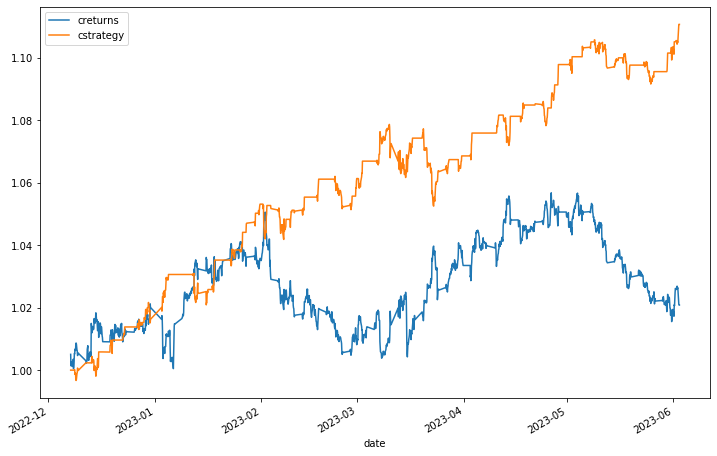

In [28]:
new[['creturns', 'cstrategy']].plot(figsize = (12,8))

In [29]:
trading_cost = 0.00007

In [30]:
# to insert when a trade takes place
new['trades'] = new.position.diff().fillna(0).abs()
new

,close,SMA,Lower,Upper,log_returns,distance,position,strategy,creturns,cstrategy,trades
date,,,,,,,,,,,
2022-12-07 12:00:00,1.05425,1.050533,1.043247,1.057820,0.005040,0.003717,0.0,0.000000,1.005053,1.000000,0.0
2022-12-07 14:00:00,1.05040,1.050278,1.043568,1.056989,-0.003659,0.000122,0.0,-0.000000,1.001382,1.000000,0.0
2022-12-07 16:00:00,1.05180,1.050060,1.044046,1.056074,0.001332,0.001740,0.0,0.000000,1.002717,1.000000,0.0
2022-12-07 18:00:00,1.05145,1.049978,1.044115,1.055841,-0.000333,0.001472,0.0,-0.000000,1.002383,1.000000,0.0
2022-12-07 20:00:00,1.05045,1.049795,1.044378,1.055212,-0.000952,0.000655,0.0,-0.000000,1.001430,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-02 12:00:00,1.07420,1.071840,1.063803,1.079877,-0.001442,0.002360,-1.0,0.001442,1.024072,1.107397,0.0
2023-06-02 14:00:00,1.07230,1.072003,1.064143,1.079864,-0.001770,0.000297,-1.0,0.001770,1.022260,1.109359,0.0
2023-06-02 16:00:00,1.07100,1.072117,1.064422,1.079811,-0.001213,-0.001117,0.0,0.001213,1.021021,1.110706,1.0


In [31]:
# total number of trades
new.trades.count()

1573

In [32]:
# after trade cost return
new['strategy_net'] = new.strategy - new.trades * trading_cost

In [33]:
# cumultative after trade cost return
new['cstrategy_net'] = new.strategy_net.cumsum().apply(np.exp)

In [34]:
new

,close,SMA,Lower,Upper,log_returns,distance,position,strategy,creturns,cstrategy,trades,strategy_net,cstrategy_net
date,,,,,,,,,,,,,
2022-12-07 12:00:00,1.05425,1.050533,1.043247,1.057820,0.005040,0.003717,0.0,0.000000,1.005053,1.000000,0.0,0.000000,1.000000
2022-12-07 14:00:00,1.05040,1.050278,1.043568,1.056989,-0.003659,0.000122,0.0,-0.000000,1.001382,1.000000,0.0,-0.000000,1.000000
2022-12-07 16:00:00,1.05180,1.050060,1.044046,1.056074,0.001332,0.001740,0.0,0.000000,1.002717,1.000000,0.0,0.000000,1.000000
2022-12-07 18:00:00,1.05145,1.049978,1.044115,1.055841,-0.000333,0.001472,0.0,-0.000000,1.002383,1.000000,0.0,-0.000000,1.000000
2022-12-07 20:00:00,1.05045,1.049795,1.044378,1.055212,-0.000952,0.000655,0.0,-0.000000,1.001430,1.000000,0.0,-0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-02 12:00:00,1.07420,1.071840,1.063803,1.079877,-0.001442,0.002360,-1.0,0.001442,1.024072,1.107397,0.0,0.001442,1.100365
2023-06-02 14:00:00,1.07230,1.072003,1.064143,1.079864,-0.001770,0.000297,-1.0,0.001770,1.022260,1.109359,0.0,0.001770,1.102315
2023-06-02 16:00:00,1.07100,1.072117,1.064422,1.079811,-0.001213,-0.001117,0.0,0.001213,1.021021,1.110706,1.0,0.001143,1.103576


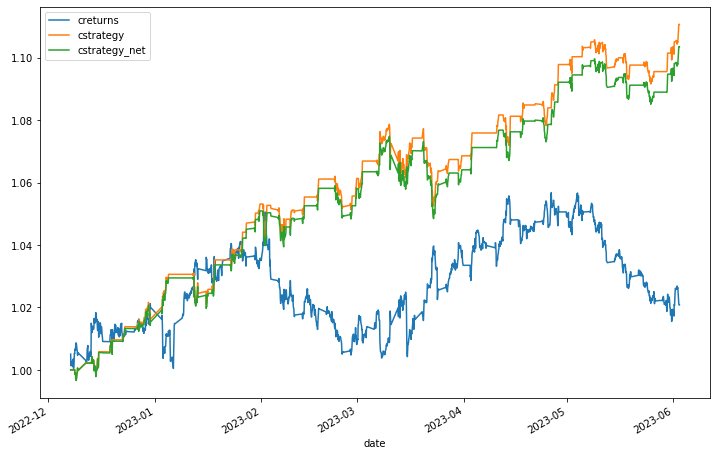

In [35]:
new[['creturns', 'cstrategy', 'cstrategy_net']].plot(figsize = (12,8))

In [36]:
# annualised risk and return (12 two hour periods in a day * 252 trading days)
new[['log_returns', 'strategy_net']].mean() * (12 * 252)

log_returns     0.039634
strategy_net    0.189468
dtype: float64

In [37]:
new[['log_returns', 'strategy_net']].std() * np.sqrt(12 * 252)

log_returns     0.080346
strategy_net    0.056058
dtype: float64

## Creating Function


In [38]:
class MeanRevBacktester():
    ''' Class for the vectorized backtesting of Bollinger Bands-based trading strategies.
    '''
    
    def __init__(self, symbol, SMA, dev, start, end, tc):
        '''
        Parameters
        ----------
        symbol: str
            ticker symbol (instrument) to be backtested
        SMA: int
            moving window in bars (e.g. days) for SMA
        dev: int
            distance for Lower/Upper Bands in Standard Deviation units
        start: str
            start date for data import
        end: str
            end date for data import
        tc: float
            proportional transaction/trading costs per trade
        '''
        self.symbol = symbol
        self.SMA = SMA
        self.dev = dev
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()
        self.prepare_data()
        
    def __repr__(self):
        rep = "MeanRevBacktester(symbol = {}, SMA = {}, dev = {}, start = {}, end = {})"
        return rep.format(self.symbol, self.SMA, self.dev, self.start, self.end)
        
    def get_data(self):
        ''' Imports the data from intraday_pairs.csv (source can be changed).
        '''
        raw = data['close'].to_frame()
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        self.data = raw
        
    def prepare_data(self):
        '''Prepares the data for strategy backtesting (strategy-specific).
        '''
        data = self.data.copy()
        data["SMA"] = data["price"].rolling(self.SMA).mean()
        data["Lower"] = data["SMA"] - data["price"].rolling(self.SMA).std() * self.dev
        data["Upper"] = data["SMA"] + data["price"].rolling(self.SMA).std() * self.dev
        self.data = data
        
    def set_parameters(self, SMA = None, dev = None):
        ''' Updates parameters (SMA, dev) and the prepared dataset.
        '''
        if SMA is not None:
            self.SMA = SMA
            self.data["SMA"] = self.data["price"].rolling(self.SMA).mean()
            self.data["Lower"] = self.data["SMA"] - self.data["price"].rolling(self.SMA).std() * self.dev
            self.data["Upper"] = self.data["SMA"] + self.data["price"].rolling(self.SMA).std() * self.dev
            
        if dev is not None:
            self.dev = dev
            self.data["Lower"] = self.data["SMA"] - self.data["price"].rolling(self.SMA).std() * self.dev
            self.data["Upper"] = self.data["SMA"] + self.data["price"].rolling(self.SMA).std() * self.dev
            
    def test_strategy(self):
        ''' Backtests the Bollinger Bands-based trading strategy.
        '''
        data = self.data.copy().dropna()
        data["distance"] = data.price - data.SMA
        data["position"] = np.where(data.price < data.Lower, 1, np.nan)
        data["position"] = np.where(data.price > data.Upper, -1, data["position"])
        data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])
        data["position"] = data.position.ffill().fillna(0)
        data["strategy"] = data.position.shift(1) * data["returns"]
        data.dropna(inplace = True)
        
        # determine the number of trades in each bar
        data["trades"] = data.position.diff().fillna(0).abs()
        
        # subtract transaction/trading costs from pre-cost return
        data.strategy = data.strategy - data.trades * self.tc
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
       
        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the performance of the trading strategy and compares to "buy and hold".
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | SMA = {} | dev = {} | TC = {}".format(self.symbol, self.SMA, self.dev, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))     
   
    def optimize_parameters(self, SMA_range, dev_range):
        ''' Finds the optimal strategy (global maximum) given the Bollinger Bands parameter ranges.

        Parameters
        ----------
        SMA_range, dev_range: tuple
            tuples of the form (start, end, step size)
        '''
        
        combinations = list(product(range(*SMA_range), range(*dev_range)))
        
        # test all combinations
        results = []
        for comb in combinations:
            self.set_parameters(comb[0], comb[1])
            results.append(self.test_strategy()[0])
        
        best_perf = np.max(results) # best performance
        opt = combinations[np.argmax(results)] # optimal parameters
        
        # run/set the optimal strategy
        self.set_parameters(opt[0], opt[1])
        self.test_strategy()
                   
        # create a df with many results
        many_results =  pd.DataFrame(data = combinations, columns = ["SMA", "dev"])
        many_results["performance"] = results
        self.results_overview = many_results
                            
        return opt, best_perf

## Backtesting and Forward Testing

In [39]:
# train sample is half of 6 months i.e 3 months
train = MeanRevBacktester('close', 30, 2, "2022-12-07", "2023-03-06", trading_cost)

In [40]:
train

MeanRevBacktester(symbol = close, SMA = 30, dev = 2, start = 2022-12-07, end = 2023-03-06)

In [41]:
# find optimal
train.optimize_parameters((25, 100, 1), (1, 5, 1)) 

((26, 1), 1.078039)

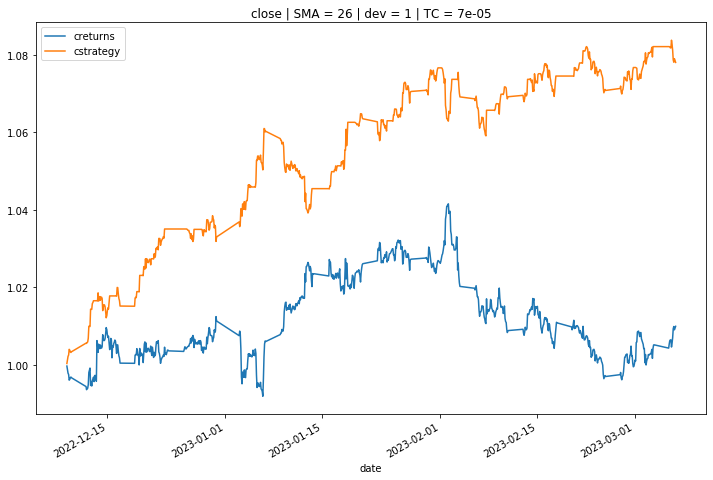

In [42]:
train.plot_results() # in-sample

In [43]:
test = MeanRevBacktester('close', 26, 1, "2023-03-07", "2023-06-02", trading_cost) # out-sample

In [44]:
test

MeanRevBacktester(symbol = close, SMA = 26, dev = 1, start = 2023-03-07, end = 2023-06-02)

In [45]:
#performance using forward testing
test.test_strategy()

(0.996883, -0.018141)